# Машинне навчання

## Навчання без учителя: задачi кластеризацiї

## Метод DBSCAN


###  Лабораторна робота 7


**_Студентка Пороскун Олена. Група ПМ.м-21_**

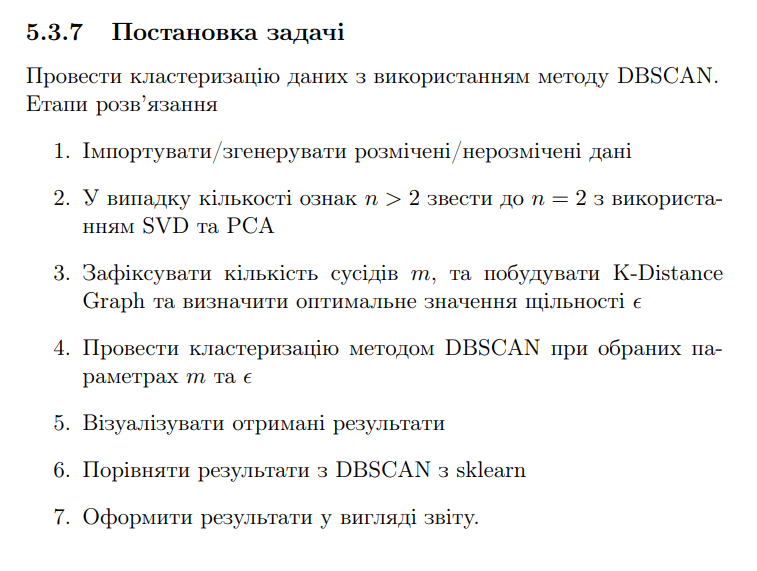

_________________________________________________________________________________________________________________________

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

**1**

In [3]:
# генеруємо дані
def make_circle(r, n, noise = 30, seed = 1234):
    np.random.seed(seed)
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-noise,noise), math.sin(2*math.pi/n*x)*r+np.random.normal(-noise,noise)) for x in range(1,n+1)]

small_circle = make_circle(100, 300, 10)
medium_circle = make_circle(300, 700, 20)
big_circle = make_circle(500, 1000, 30)

noise = [(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)]

In [4]:
def arrray_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

data = [arrray_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]
data = pd.concat(data)
data.columns = ['x', 'y', 'cluster']

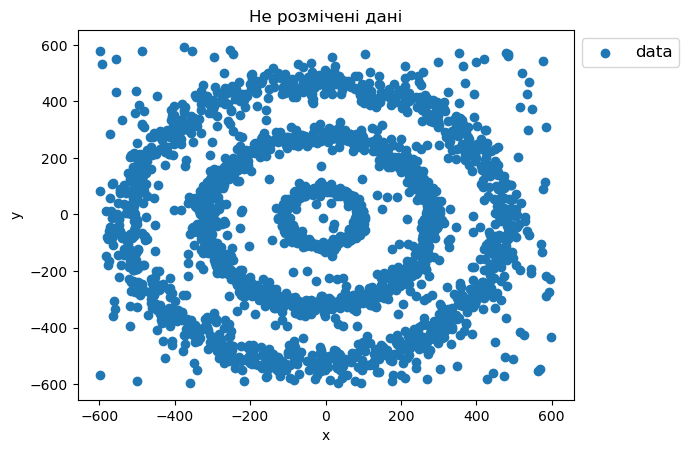

In [5]:
plt.scatter(data['x'], data['y'], label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Не розмічені дані")
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})

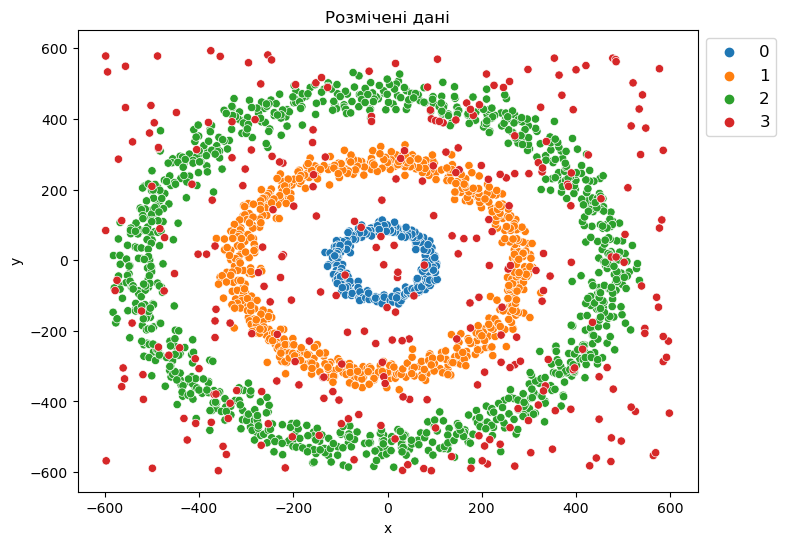

In [6]:
plt.rcParams['figure.figsize'] = [8,6]
sns.scatterplot(data = data, x = 'x',y = 'y',hue = 'cluster')
plt.title("Розмічені дані")
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})

**3**

Text(0.5, 1.0, 'K-Distance Graph')

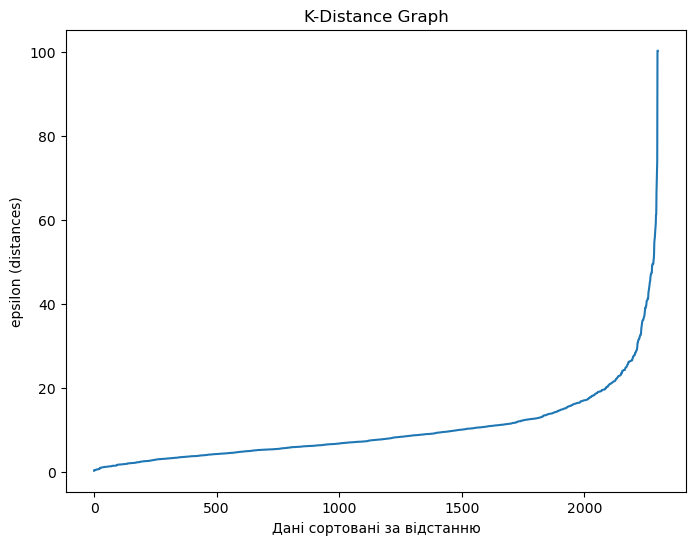

In [7]:
k = 2
data_nn = data.copy()[['x', 'y']]

nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(x = i, y = distances)
plt.xlabel("Дані сортовані за відстанню")
plt.ylabel("epsilon (distances)")
plt.title('K-Distance Graph')

**4**

In [8]:
class dbscan:

    def __init__(self, epsilon = None, min_samples = None, distance = 'euclidean', normalize = False):
        self.epsilon = epsilon
        self.min_samples = min_samples
        self.distance = distance
        self.normalize = normalize

    def find_distance(self, x, type = 'euclidean'):
        """
        Finds distance between numpy arrays.
        """
        return distance.squareform(distance.pdist(x, type))

    def normalization(self, x):
        return (x-np.min(x))/(np.max(x) - np.min(x))

    def find_neighbors(self, x):
        return np.where(x <= self.epsilon)[0]
  
    def expand_cluster(self, neighbors, x, cluster, labels):

    # Iterate over each neighbor
        for neighbor in neighbors:
      # Check that is not assigned
            if labels[neighbor] == 0:
                # Find neighbors
                neighbor_neighbors = self.find_neighbors(x[neighbor])
                # Check if is core
                if len(neighbor_neighbors) >= self.min_samples:
                    labels[neighbor] = cluster
                    # For each neighbor in neighbors, expand cluster
                    labels = self.expand_cluster(neighbor_neighbors, x, cluster, labels)
        return labels

    def fit(self, x):
        """
        Given a reference point and comparison points and a distance function, returns the index of the neighbors.
        """
        # Do normalization
        if self.normalize:
            x = self.normalization(x)

        # Find distance
        dist_matrix = self.find_distance(x, self.distance)

        # Initialize cluster
        cluster = 1
        n_obs = x.shape[0]
        labels = np.zeros(n_obs)

        for i in range(n_obs):

            # If value not assigned
            if labels[i] == 0:

                # Find neighbors
                neighbors = self.find_neighbors(dist_matrix[i])

                # Check if neighbors > min_samples (self included as neighbor)
                if len(neighbors) > self.min_samples:

                    # If observation is not assigned --> Assign to cluster
                    if labels[i] == 0:
                        labels[i] = cluster

                        # Expand cluster on neighbors
                    labels = self.expand_cluster(neighbors, dist_matrix, cluster, labels)

                    # Go to next cluster          
                    cluster = cluster + 1

        return labels

In [9]:
data['dbscan_custom'] = dbscan(epsilon=32, min_samples=5).fit(data[['x', 'y']].to_numpy())

**5**

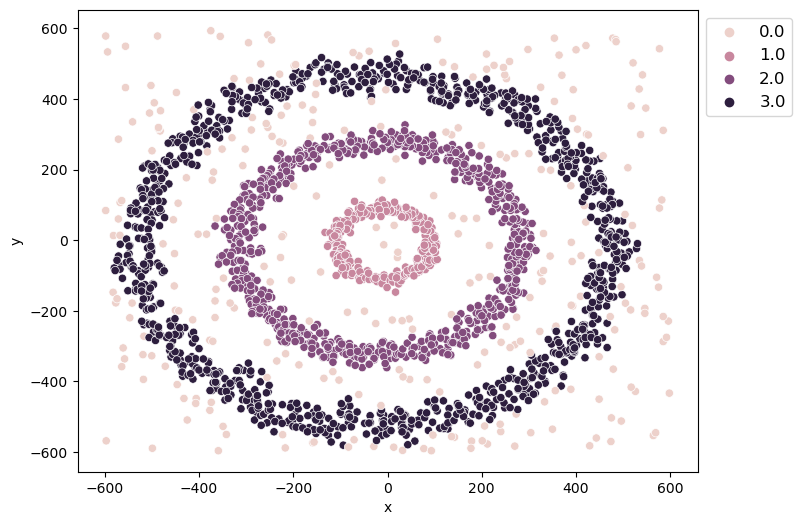

In [10]:
sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'dbscan_custom')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})

**6**

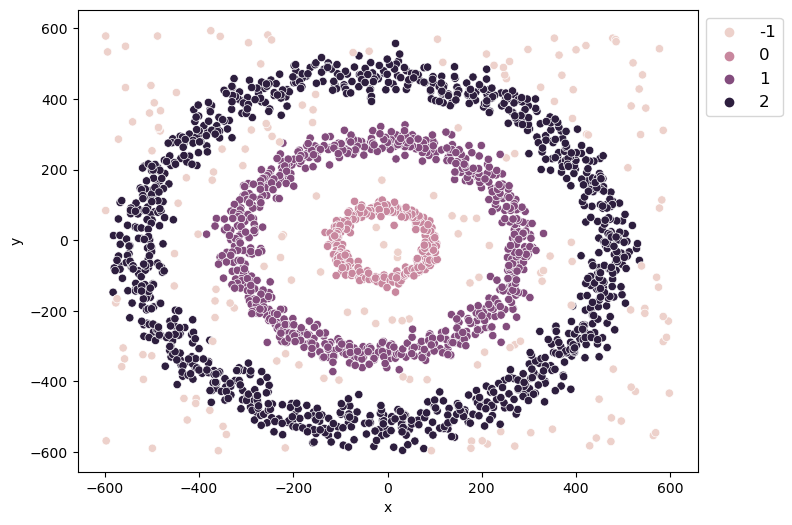

In [11]:
data2 = data.copy()
data2['dbscan2'] = DBSCAN(eps=32, min_samples=5).fit_predict(data[['x', 'y']])
sns.scatterplot(data = data2, x = 'x', y = 'y', hue = 'dbscan2')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})

Отже, результати ідентичні.

_________________________________________________________________________________________________________________________